In [ ]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib as mpl
import numpy as np
import csv
import tables as tb
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as p
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import norm
import os
import matplotlib.mlab as mlab
root_path = os.path.dirname(__file__)
#A school has 1200 students, with exactly 200 students each in grades 7 through 12. 
#The population distribution is, as the following figure shows, definitely not normal.
#prepare different samples [20,60,80,100,150,200] 
grades = ["Grade_7", "Grade_8", "Grade_9", "Grade_10", "Grade_11", "Grade_12"]
N_size =  [20,60,80,100,150,200] 
N_sample =1000
g_mean = np.zeros((len(grades),N_sample,len(N_size)))

In [9]:
def read_excel_sheet(file = None):
    '''
    The function will return the lists as DataFrames
    
    Parameters
    ----------
    file: 'obj' string
        the file name with xls extention [includes the path] of the file under test
    
    returns
    -------
    pandas data frames of the excel sheets under test
    '''
    xls_file   = pd.ExcelFile(file)
    data_frame = pd.read_excel(xls_file, 'exam_data')
    grade_7    = pd.read_excel(xls_file, 'grade_7')
    display(data_frame)
    return data_frame, grade_7

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

def save_csv(headers = None, file_name = None):
    out_file_csv = open(file_name+'.csv', 'w+')
    writer = csv.DictWriter(out_file_csv, fieldnames=headers,delimiter=",")
    writer.writeheader()  
    return writer

# getter Methods 
def get_data_info(list = None,name_to_set = None, name_to_get = None , info_to_set = None):
    condition_name = (list[name_to_set] == info_to_set)
    if condition_name.any() == True:   
        out_name = list[condition_name][name_to_get]
    else:
        out_name = None
    return out_name  

def generate_data(grades = None,N_size = None,N_sample = None,mean_matrix = None  ):            
    '''
    The function will generate the required data
    '''
    for g in np.arange(len(grades)):
        csv_writer = save_csv(headers = N_size, file_name = "statistics_output_"+grades[g])
        for s in np.arange (N_sample):
            for n in np.arange(len(N_size)):
                data_subset = data_frame[grades[g]].sample(n=N_size[n])
                #get the mean of each class of that sample 
                mean_matrix[g][s][n] = np.mean(data_subset)
            g_mean_row = {e: mean_matrix[g][s][i] for i, e in enumerate(N_size)}
            csv_writer.writerow(g_mean_row)
    return mean_matrix

def plot_data(grades = None,N_size = None,N_sample = None,mean_matrix = None  ):  
     for g in np.arange(len(grades)):
        fig, axes = plt.subplots(nrows=1, ncols=len(N_size), figsize=(20, 5))
        for n in np.arange(len(N_size)):
            #Histogram the data
            data_hist = g_mean[g][:,n]
            _, bins, _  = axes[n].hist(data_hist, density=1, facecolor='g', alpha=0.75)
            # best fit of data
            mu, sigma = norm.fit(data_hist)
            data_fit = norm.pdf( bins, mu, sigma)
            axes[n].plot(bins,data_fit, 'r--', linewidth=2)
            #Styles
            txt = grades[g]+": "+ r'$\mu=%.2f,\ \sigma=%.2f$'%(mu,sigma)
            axes[n].text(0.95, 0.35,txt, fontsize=12,
                    horizontalalignment='right', verticalalignment='top', transform=axes[n].transAxes,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.2)) 
            axes[n].set_ylabel("Frequency")
            axes[n].set_xlabel("Estimate of Mean")
            axes[n].autoscale(enable=True, axis='x', tight=None)
            axes[n].set_title("Sampling distribution for (N={})".format(N_size[n]), fontsize=12)
            #axes[n].set_xlim([12, 16])
            axes[n].grid(True)
            plt.tight_layout()

# Load and print Data

In [ ]:
data_frame, grade_7 = read_excel_sheet(file = root_path+"/data/data-entry.xlsx" )

,Grade_7,Grade_8,Grade_9,Grade_10,Grade_11,Grade_12
0,5.0,5.0,5.0,5.0,5.0,5.0
1,10.0,10.0,10.0,15.0,10.0,10.0
2,15.0,15.0,15.0,5.0,15.0,15.0
3,20.0,20.0,20.0,10.0,20.0,20.0
4,15.0,15.0,15.0,15.0,15.0,15.0
...,...,...,...,...,...,...
195,20.0,10.0,10.0,10.0,10.0,10.0
196,15.0,10.0,10.0,10.0,10.0,10.0
197,15.0,12.0,12.0,12.0,12.0,12.0
198,12.0,12.0,12.0,12.0,12.0,12.0


# Mean of grades

In [11]:
g_mean = generate_data(grades = grades,N_size = N_size,N_sample = N_sample,mean_matrix = g_mean) 

# Plot and Fit

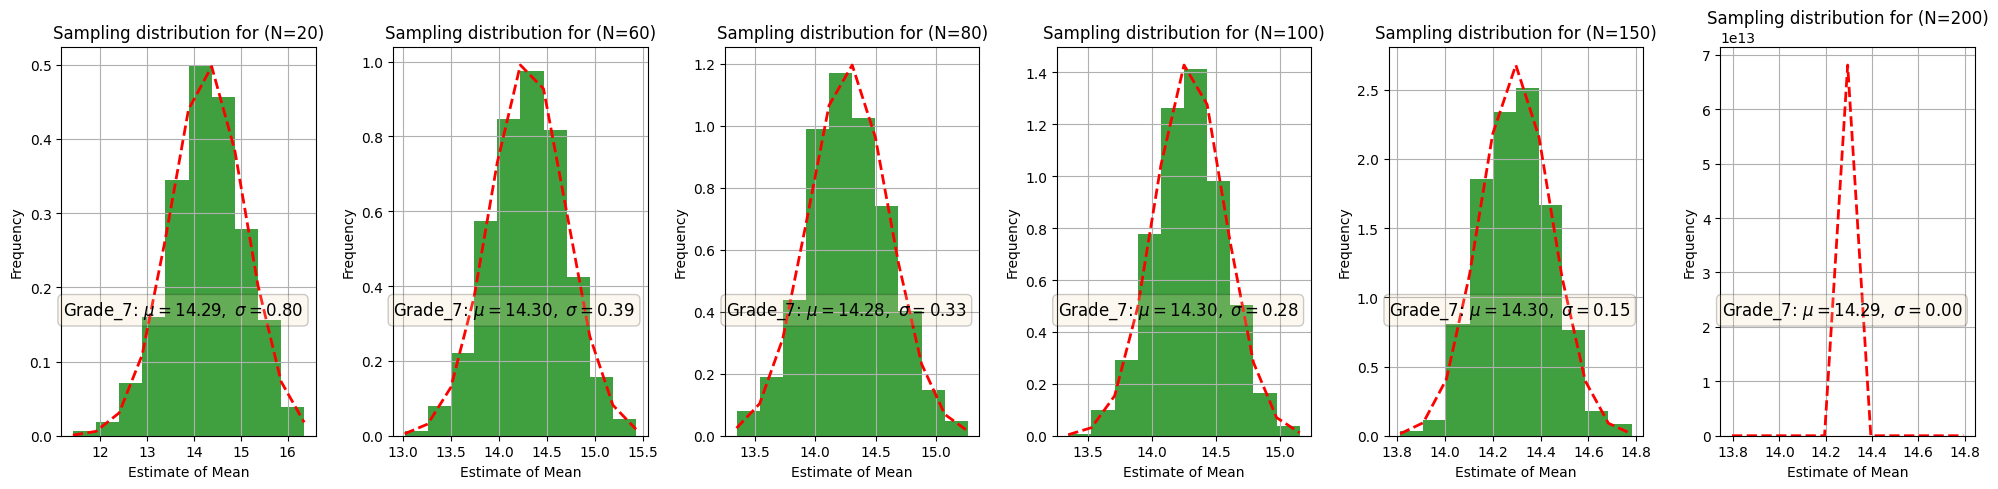

In [12]:
plots = plot_data(grades = [grades[0]],N_size = N_size,N_sample = N_sample,mean_matrix = g_mean) 

We take a sample of 36 students who have received a novel form of education and wish to determine if these individuals are systematically smarter than the rest of the population.
To do so:
1. we calculate the mean for our sample
2. consider how likely we would be to observe this value if the students were actually not any different (the null hypothesis).

In [13]:
novel_students = get_data_info(list = grade_7,name_to_set = "novel_student", name_to_get = "exam_results" , info_to_set = 1)
novel_students_sample = novel_students.sample(n=36)
grade_7_sample = grade_7["exam_results"].sample(n=36)
print("the sample mean observed of 36 students in novel students ",np.mean(novel_students_sample))
print("the sample mean observed of 36 students is in whole sample",np.mean(grade_7_sample))

the sample mean observed of 36 students in novel students  16.61111111111111
the sample mean observed of 36 students is in whole sample 13.555555555555555


We know that, even if our students were not any different from the general public, we may still observe a the same mean simply due to random sampling. Is this value sufficiently rare under repeated sampling that we can say our sample is different?
